In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [162]:
#on charge les données
plant_data = pd.read_csv('data_viz_species_data.csv')
plant_data.dropna()
plant_data.head()

,id,FAMILY,STRATUM,REGION OF ORIGIN,TYPE OF ECOSYSTEM,DISTRIBUTION,BIOME,LIFE CYCLE,ENVIRONMENTAL TOLERANCE,LIGHT REQUIREMENT,CO BENEFITS,SIZE,DIAMETER,SEEDS/KG
0,Name name,NaN,"Shrub,Tree,Liana,Herb,Subshrub,Palm",Native region,NaN,"Countries,Continent","Mata Atlântica,Amazônia","Perennial,Annual,Biannual","Drought,Acid soil,Degraded soil,Sandy soil,Var...","Low,Medium,High","Medicinal,Manure,Food,Wood,Material,Biodiversi...",m,cm,unit/kg
1,ce584b94-ddbe-40af-94e9-6d8180aad3b2,Brassicaceae,Herb,NaN,Any ecosystem,NaN,NaN,Annual,"Drought,Temperature",NaN,"Food,Medicinal",20-30,NaN,100000
2,c0853870-94a0-4d01-a2ca-8b04b225dee4,Boraginaceae,Tree,"Central America,French Guiana,Argentina","Amazon rainforest,Tropical forests","Central America,Tanzania,Kenya,West Indies,",Amani Nature Reserve,Perennial,NaN,NaN,"Wood,Shade,Food,Medicinal,Biofuel",15-45,35-100,71000
3,90540466-2500-4b8e-8068-504601819e20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8e582f5d-df18-49a7-bc93-f262b92ef804,Annonaceae,Shrub,NaN,Amazon rainforest,NaN,Amazonia,NaN,NaN,NaN,NaN,NaN,NaN,4000


In [163]:
plant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       135 non-null    object
 1   FAMILY                   126 non-null    object
 2   STRATUM                  127 non-null    object
 3   REGION OF ORIGIN         47 non-null     object
 4   TYPE OF ECOSYSTEM        98 non-null     object
 5   DISTRIBUTION             69 non-null     object
 6   BIOME                    40 non-null     object
 7   LIFE CYCLE               65 non-null     object
 8   ENVIRONMENTAL TOLERANCE  45 non-null     object
 9   LIGHT REQUIREMENT        10 non-null     object
 10  CO BENEFITS              75 non-null     object
 11  SIZE                     92 non-null     object
 12  DIAMETER                 22 non-null     object
 13  SEEDS/KG                 109 non-null    object
dtypes: object(14)
memory usage: 14.9+ KB


In [164]:
#famille les plus représentées
most_represented_families = plant_data['FAMILY'].value_counts()
most_represented_families.head(5)


FAMILY
Fabaceae         58
Solanaceae        6
Bignoniaceae      6
Annonaceae        5
Euphorbiaceae     5
Name: count, dtype: int64

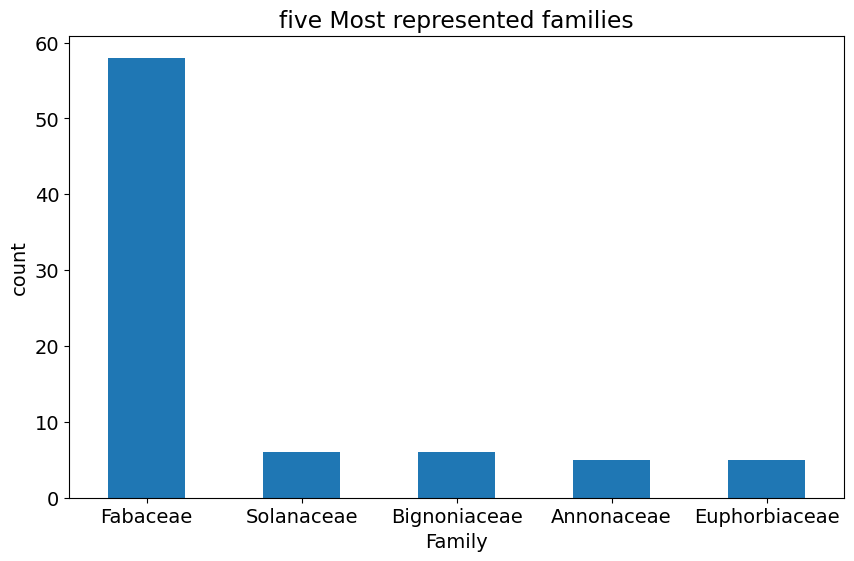

In [166]:
#plot the more represented families
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
most_represented_families.head(5).plot(kind='bar')
plt.title('five Most represented families')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.xlabel('Family')
plt.show()


In [167]:
#list all the differents cobenefits 
cobenefits = plant_data['CO BENEFITS']
cobenefits = cobenefits.dropna()
result = []
for co in cobenefits:
    x = co.split(',')
    for j in x:
        result.append(j)

#on liste le nombre de fois que chacun apparait
result = pd.Series(result)

print(result.value_counts()) 




Medicinal                                  53
Food                                       26
Biodiversity                               21
Wood                                       15
Material (with fruit)                      14
Material                                    9
Ornamental                                  6
Patrimonial                                 5
Manure                                      5
Shade                                       3
Fodder                                      3
Forage                                      2
Shading                                     1
Wood fabrication                            1
paper                                       1
construction for purposes such as beams     1
Honey production                            1
A red resin exudes from the bark            1
Dye                                         1
scantlings                                  1
laths and floor boards                      1
Dry fruit use as spice            

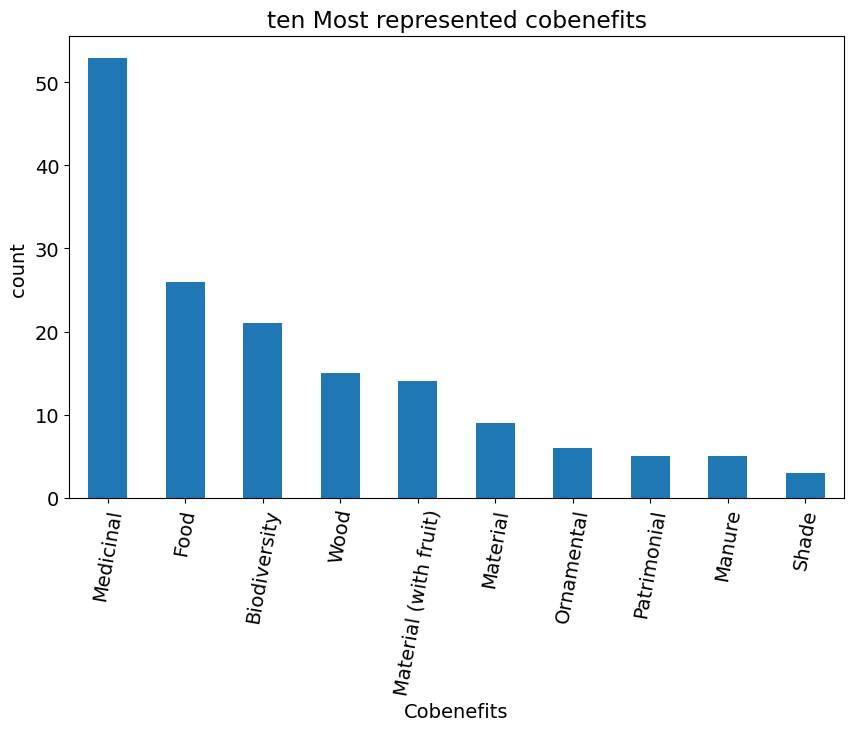

In [168]:
#plot the 10 most represented cobenefits
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
cobenefits = pd.Series(result)
most_represented_cobenefits = cobenefits.value_counts()
most_represented_cobenefits.head(10).plot(kind='bar')
plt.title('ten Most represented cobenefits')
plt.ylabel('count ')
plt.xticks(rotation=80)
plt.xlabel('Cobenefits')
plt.show()

In [169]:
#average, median and standard deviation of the size, diameter and seeds/kg columns
plant_data.describe()
plant = plant_data.iloc[1:,:]
plant = plant['SIZE'].dropna()
#pour les endroits avec intervale de valeur on prend la moyenne
result1 = []
for pla in plant:
    if '-' in pla:
        x = pla.split('-')
        result1.append((float(x[0]) + float(x[1]))/2)
    else:
        result1.append(float(pla))
#on calcule la moyene, la mediane et l'ecart type
plant= pd.Series(result1)
mean = plant.mean()
median = plant.median()
std = plant.std()

print('la moyenne de size est :', mean)
print('la mediane de size est :', median)
print('l\'ecart type de size est :', std)

la moyenne de size est : 14.274725274725276
la mediane de size est : 11.0
l'ecart type de size est : 12.172565633027167


la moyenne de la colonne size est : 14.274725274725276

la mediane de la colonne size est : 11.0

l'ecart type de la colonne size est : 12.172565633027167

In [101]:
#on fait la meme chose pour DIAMETER 
plant = plant_data.iloc[1:,:]
plant = plant['DIAMETER'].dropna()
result = []
for pla in plant:
    if '-' in pla:
        x = pla.split('-')
        result.append((float(x[0]) + float(x[1]))/2)
    else:
        result.append(float(pla))
plant= pd.Series(result)
mean = plant.mean()
median = plant.median()
std = plant.std()

print('la moyenne de diameter est :', mean)
print('la mediane de diameter est :', median)
print('l\'ecart type de diameter est :', std)


la moyenne de diameter est : 56.13095238095238
la mediane de diameter est : 40.0
l'ecart type de diameter est : 36.6697780065222


la moyenne de la colonne diameter est : 56.13095238095238

la mediane de la colonne diameter est : 40.0

l'ecart type de la colonne diameter est : 36.6697780065222

In [170]:
#on fait la meme chose pour SEEDS/KG
#on fait la meme chose pour DIAMETER 
plant = plant_data.iloc[1:,:]
plant = plant['SEEDS/KG'].dropna()
result = []
for pla in plant:
    if '-' in pla:
        x = pla.split('-')
        result.append((float(x[0]) + float(x[1]))/2)
    else:
        result.append(float(pla))
plant= pd.Series(result)
mean = plant.mean()
median = plant.median()
std = plant.std()

print('la moyenne de seed est :', mean)
print('la mediane de seed est :', median)
print('l\'ecart type de seed est :', std)


la moyenne de seed est : 74607.86111111111
la mediane de seed est : 14950.0
l'ecart type de seed est : 161598.8491745861


la moyenne de la colonne seed est : 74607.86111111111

la mediane de la colonne seed est : 14950.0

l'ecart type de la colonne seed est : 161598.8491745861

<Figure size 1000x600 with 0 Axes>

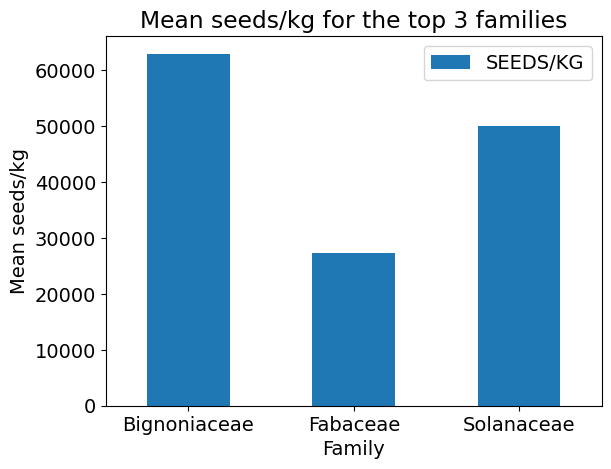

In [127]:
#for each of the top 3 families, calsulate the means seeds/kg
top3_families = most_represented_families.head(3).index
#on prend les données correspondant à ces familles
top3_families_data = plant_data[plant_data['FAMILY'].isin(top3_families)]
#on prend les données de seeds/kg pour chaque famile et on calcule la moyenne
top3_families_data.loc[:,'SEEDS/KG'] = pd.to_numeric(top3_families_data['SEEDS/KG'])

top3_families_data = top3_families_data.groupby('FAMILY').agg({'SEEDS/KG':'mean'})
#present your answer as a plot best suited to the situation.
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
top3_families_data.plot(kind='bar')
plt.title('Mean seeds/kg for the top 3 families')
plt.ylabel('Mean seeds/kg')
plt.xticks(rotation=0)
plt.xlabel('Family')
plt.show()

Text(0.5, 1.0, 'Correlation between Family, size and seeds')

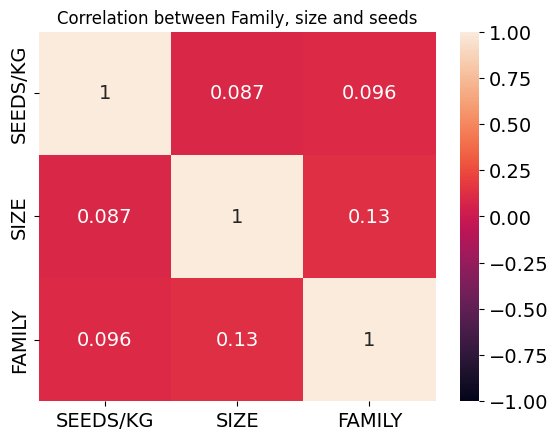

In [171]:
#verify if seeds/kg is correlated with size an family
plant = plant_data.iloc[1:,:]
plant = plant[['SEEDS/KG','SIZE','FAMILY']].dropna()
#on convertit les données en float
plant.loc[:,'SEEDS/KG'] = pd.to_numeric(plant['SEEDS/KG'])
result = []
for pla in plant['SIZE']:
    if '-' in pla:
        x = pla.split('-')
        result.append((float(x[0]) + float(x[1]))/2)
    else:
        result.append(float(pla))  
plant.loc[:,'SIZE'] = result
#on cree un data frame qui contiendra  family, seed et size pour calculer coorelation
dataframe = plant[['SEEDS/KG','SIZE','FAMILY']]
#print(dataframe['FAMILY'].values)

#on converti les donnes de family en nombre:e
dataframe['FAMILY'] = pd.factorize(dataframe['FAMILY'])[0]
#dataframe['FAMILY'].values

heatmap = sns.heatmap(dataframe.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation between Family, size and seeds', fontdict={'fontsize':12})



On remarque que les variables seeds/kg et size ne sont pas très correlées, de meme pour family et seeds/kg